## Building Neural networks from scratch


### importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### building a toy dataset

In [2]:
X = np.random.randn(2,50)
y = X[0,:] * 8 + X[1,:] * 5 + 3
X, y

(array([[ 1.00529577,  0.97490389,  0.32647629,  1.20799539, -0.66322405,
          1.81513447, -0.39875586, -1.60481749, -0.65523289,  0.08697505,
          0.11293369, -0.14735801,  0.42638495, -0.2110756 ,  0.27260616,
          1.13493061, -1.20576435,  0.79892326,  0.25291161, -1.49982849,
          0.08346918, -0.59712966, -0.73178598, -0.71117082, -0.93065453,
         -0.17252037, -0.76482273,  0.56404153,  1.15738402, -0.7822368 ,
          1.24981149, -0.36251478, -0.63968045, -0.10933242, -1.21845561,
         -1.20058446, -0.51802284, -1.18173843, -0.74347831,  0.76566352,
          0.11932717, -0.94236145, -1.40489232, -0.50814667, -0.06242328,
          0.68100472, -1.53236602,  2.58062987,  0.90884484, -1.0807957 ],
        [-1.66109053, -0.55552358, -0.12382074, -0.85027857, -0.70275004,
         -1.19278926,  1.3121696 ,  1.97379468,  0.72149528, -0.84176097,
          0.97617007, -1.37636089,  0.64680314,  0.15847909,  1.63531643,
          0.36582782, -0.49352295, -0

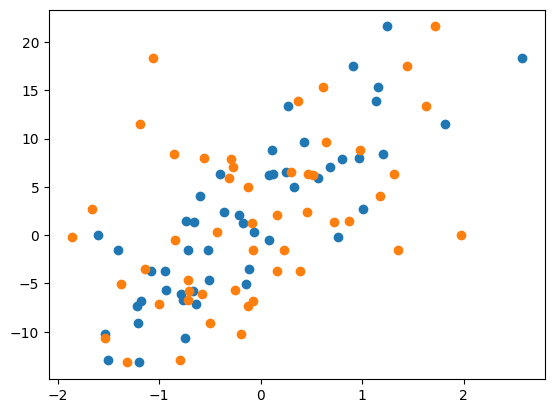

In [3]:
plt.scatter(x=X[0,:],y=y)
plt.scatter(x=X[1,:],y=y)

### Building neural network with one hidden layer

In [4]:
def initialize_parameters(n_in, n_h, n_out):
    """
    initializes model parameters.

    Arguments:
    n_in: number of input units
    n_h: number of hidden units
    n_out: number of output units

    Return:
    parameters: dictionary of all the randomly intialized parameters
    
    """

    np.random.seed(42)

    W1 = np.random.rand(n_h, n_in)
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_out, n_h)
    b2 = np.random.rand(n_out, 1)

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [5]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X: input data of shape (n_x, m)
    parameters: randomly initialized model parameters

    Return:
    A2 = sigmoid output of second activation
    cache = dictionary of Z1, A1, Z2 and A2
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward pass
    Z1 = W1 @ X
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1
    A2 = Z2

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2, cache

In [6]:
def compute_loss(A2, Y):
    """
    compute Mean Squared Error loss of the model
    Arguments:
    A2: Prediction of the model
    Y: "true" label vactor of shape (1, number of samples)

    Return:
    loss: computed scalar loss of the model
    """

    m = len(Y)
    loss = 1/m * np.sum((A2 - Y) ** 2)
    return loss

In [7]:
def backward_propagation(parameters, cache, X, Y):
    """ computes gradient of the model parameters
    
    Arguments:
    parameters: dictionary of the parameters of the model
    cache: a dictionary containing Z1, A1, Z2 and A2
    X: input data of shape (2, number of example)
    Y: "true" label vector of shape (1, number of example)
    
    Return:
    grad: dictionary of the gradients of each model parameters
    """

    m = len(Y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Backpropagation
    dA2 = (2/m) * (A2 - Y) # (1, m)
    dZ2 = dA2 # (1,m)
    dW2 = dZ2 @ A1.T #(1, n_h)
    db2 = np.sum(dZ2, axis=1, keepdims=True) # (1,1)
    dA1 = W2.T @ dZ2 # (n_h, m)
    dZ1 = dA1 * (1 - np.power(A1,2)) # (n_h, m)
    dW1 = dZ1 @ X.T # (n_h, n_in)
    db1 = np.sum(dZ1, axis=1, keepdims=True) # (1, n_h)

    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}

    return grads

In [8]:
parameters = initialize_parameters(2, 4, 1)
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [9]:
A2, cache = forward_propagation(X, parameters)
A2

array([[-0.92848217, -0.11890948,  0.02808425, -0.30495094, -0.89830295,
        -0.35402029,  0.93629905,  0.89336059,  0.43322706, -0.76020896,
         0.90472995, -1.0809373 ,  0.79568848,  0.0681803 ,  1.1657933 ,
         0.8146868 , -0.91165604,  0.07347056,  0.44560211, -1.09741066,
         0.57264858,  0.80322161,  0.53380569, -0.10472588, -0.67032986,
        -0.17745964, -0.9293144 , -0.06119127,  0.96538841, -0.85475274,
         1.25872207,  0.3095003 , -1.03563403, -0.98197073, -0.65823917,
        -1.1979584 , -0.33060845, -0.60365683, -1.19600532, -1.05709826,
         0.54098519, -0.28114871,  0.63053491, -0.8656969 , -0.48177496,
         0.04446333, -0.8040314 ,  0.07228076,  1.19465096, -0.10689221]])

In [10]:
loss = compute_loss(A2, y)
loss

62.74328171552422

In [11]:
grads = backward_propagation(parameters=parameters, cache=cache, X=X, Y=y)
grads

{'dW1': array([[-5.76436862,  0.02007877],
        [-1.02170966, -0.1862154 ],
        [-2.0236091 , -0.85196878],
        [-1.32903952, -0.32461194]]),
 'db1': array([[-2.34409357],
        [-0.59896287],
        [-0.64312349],
        [-0.35410033]]),
 'dW2': array([[-6.14710368, -8.26111045, -2.62415714, -3.81473085]]),
 'db2': array([[-3.65387765]])}

In [12]:
from utils import *
def check_grads(parameters=parameters, grads=grads):
    """
    check the calculated gradients are correct
    """
    eps = 0.00000001
    params_theta = {}

    # convert parameter dictionary to a single vector
    param_vector = dictionary_to_vector(parameters=parameters)
    print(param_vector)
    # convert vector to dictionary
    param_dictionary = vector_to_dictionary(vector=p
        
    theta_A2, theta_cache = forward_propagation(X, params_theta)
    loss = compute_loss(A2=theta_A2, Y=y)
    print(loss)
check_grads(parameters = parameters, grads=grads)

NameError: name 'resh' is not defined

In [25]:
## manual gradient check
## lets check the gradient calculation of W1[0][0]
## making a copy of parameters
import copy

check_params = copy.deepcopy(parameters)

## nudging the W[0][0] parameter by 0.00000001
check_params["W1"][0][0] = check_params["W1"][0][0] + 0.00000001

## forward pass and loss
check_A2, check_cache = forward_propagation(parameters=check_params, X=X)
check_loss = compute_loss(A2=check_A2, Y=y)

# manually computing gradient of parameter W[0][0]
gradient = (check_loss - loss)/ 0.00000001

print(f"Numerically approximated gradient of the parameter W[0][0] is:{gradient}")
print(f"Gradient of W[0][0] calculated by backprop: {grads['dW1'][0][0]}")
print(gradient - grads['dW1'][0][0])

Numerically approximated gradient of the parameter W[0][0] is:-8.823963071336038
Gradient of W[0][0] calculated by backprop: -8.823963198010127
1.2667408810784764e-07


In [ ]:
parameters

In [ ]:
loss, check_loss